# 応用編

## 線形補間デモザイクの周波数特性

### はじめに

この章（応用編）ではより高度なデモザイクアルゴリズムを扱いますが、そのために若干アドバンストな数学的内容をとりあげます。

もし画像処理の数学的な側面に興味のない方は数式や信号処理的な説明の部分は読み飛ばし、コードとその使い方にお進みくださっても問題ありません。

### この節について

この節では以前の章で取り上げた線形補間デモザイクの特徴について調べて次の章の準備とします。

このページ内の解説は簡略版です。 詳しい解説については技術書典6で配布した書籍「ゼロから作るRAW現像」を参照下さい。

[目次ページに戻る](http://bit.ly/raw_toc)

### 準備

まずモジュールのインポートと日本語の設定を行っておきます。

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントの設定
!apt -y install fonts-ipafont-gothic
plt.rcParams['font.family'] = 'IPAPGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [0]:
# もし日本語が文字化けしている場合以下の３行の行頭の#を削除して実行後、
# import matplotlib
# target_dir = matplotlib.get_cachedir()
# ! rm {target_dir}/*.json
# その後Runtime->Restart Runtime選択してページ全体を再実行

### 線形補間フィルターの周波数特性

画像の周波数成分は低い部分に多いと考えると、サンプリング前の信号を取り出すには、低周波部分を取り出してやれば良いことになります。
信号処理的にはローパスフィルターをかけます。

ここで、線形補間の式から作ったフィルターを思い出すと、このような形をしていました。

$$
h_1 = 
\begin{bmatrix}
    0 & 1/4 &   0 \\
  1/4 &   1 & 1/4 \\
    0 & 1/4 &   0 \\
\end{bmatrix}
$$

これはそのものズバリ、ローパスフィルターです。

この周波数特性はこのようになります。

\begin{eqnarray}
H_1\left(w, v\right) 
&=& \sum_{n=-1}^{1} \sum_{m=-1}^{1} h_1 \left(n, m\right) e^{-i w n} e^{-i v m}\\
&=& \frac{1}{2} cos\left( w \right) + \frac{1}{2} cos\left( v \right) + 1
\end{eqnarray}

画像として表示してみましょう。

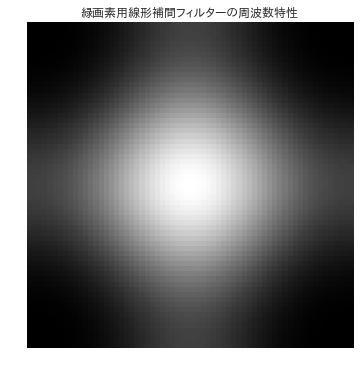

In [0]:
# 横軸と縦軸の位置
sample_num = 64
ws = np.linspace(-np.pi, np.pi, sample_num)
vs = np.linspace(-np.pi, np.pi, sample_num)

# wsとvsを並べたもの。
wmesh, vmesh = np.meshgrid(ws, vs, sparse=True)
# 周波数特性
f1 = np.cos(wmesh)/2 + np.cos(vmesh)/2 + 1
# パワーを求めるために２乗
f1 = f1 * f1

# pyplotのcountourfを使って表示
plt.figure(figsize=(6, 6))
plt.imshow(f1, cmap='gray')
plt.axis('off')
plt.title("緑画素用線形補間フィルターの周波数特性")
plt.show()

この図では明るい部分の値が大きく、暗い部分の値が小さくなっています。特に角の部分では０になります。

先程のベイヤー画像の緑画素の周波数特性の図と比べると、ちょうど４つの角にあるエイリアシングの部分で周波数特性が０になり打ち消すようになっていることがわかります。

### 赤・青画素の周波数特性とフィルター


前回使用した赤・青画素線形補間用ののFIRフィルターはこうなっています。

$$
h_2 = 
\begin{bmatrix}
  1/4 & 1/2 & 1/4 \\
  1/2 &   1 & 1/4 \\
  1/4 & 1/2 & 1/4 \\
\end{bmatrix}
$$


周波数特性はこうです。

\begin{eqnarray}
H_2\left(w, v\right) 
&=& \sum_{n=-1}^{1} \sum_{m=-1}^{1} h_2 \left(n, m\right) e^{-i w n} e^{-i v m} \\
&=& \left( 1 + cos\left( w \right) \right) \left( 1 + cos\left( v \right) \right)
\end{eqnarray}

図示してみましょう。

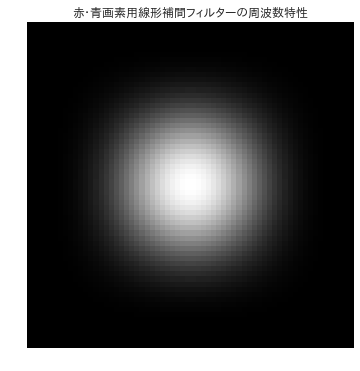

In [0]:
# 周波数特性
f2 = (1 + np.cos(wmesh)) * (1 + np.cos(vmesh))
# パワーを求めるために２乗
f2 = f2 * f2

# pyplotのcountourfを使って表示
plt.figure(figsize=(6, 6))
plt.imshow(f2, cmap='gray')
plt.axis('off')
plt.title("赤・青画素用線形補間フィルターの周波数特性")
plt.show()

ちょうと赤青画像のエイリアシングを取り除くような特性になっています。

こうしてみると理想的なフィルター処理をしているように見えますが、実際の画像はだいぶぼやけていて、細かい模様の周りには偽色という本来ないはずの色がでてきています。

画像のぼやけは、もともとの画像の周波数特性を十分にカバーしていないことを、偽色の存在は本来の信号とエイリアシングとが十分に分割できていない事を示しています。
このような単純な形のフィルターの限界でしょう。

### まとめ

今回は線形補間デモザイクフィルターの周波数特性を調べてその問題点を調べてきました。

次はこういった問題点を改善した[高度なデモザイク処理](http://bit.ly/raw_chap_6_2)に入ります。

